# 1. Exploratory Data Analysis


In [1]:
# Import libraries

# Utilities
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 300

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Stats
from scipy import stats
import time

In [2]:
# load the data
df = pd.read_csv("weatherAUS.csv")

In [3]:
# Viewing the top 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Display shape of data frame
df.shape

(145460, 23)

In [5]:
# Display info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# 2. Data Cleaning/Preparation

In [6]:
# View sum of NA and drop those with majority NaN values
df.isna().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

In [7]:
# Drop unnecessary fields or with alot of NaN values
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df.shape

(145460, 17)

In [8]:
# Drop NA rows
df = df.dropna(how='any')
df.shape

(112925, 17)

In [9]:
# Replace Yes to 1 and No to 0

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [10]:
# Replace text with numberical values (using pd dummies)

columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in columns:
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=columns)
df.head()

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize data using MinMax Scaler

scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'W

<AxesSubplot:>

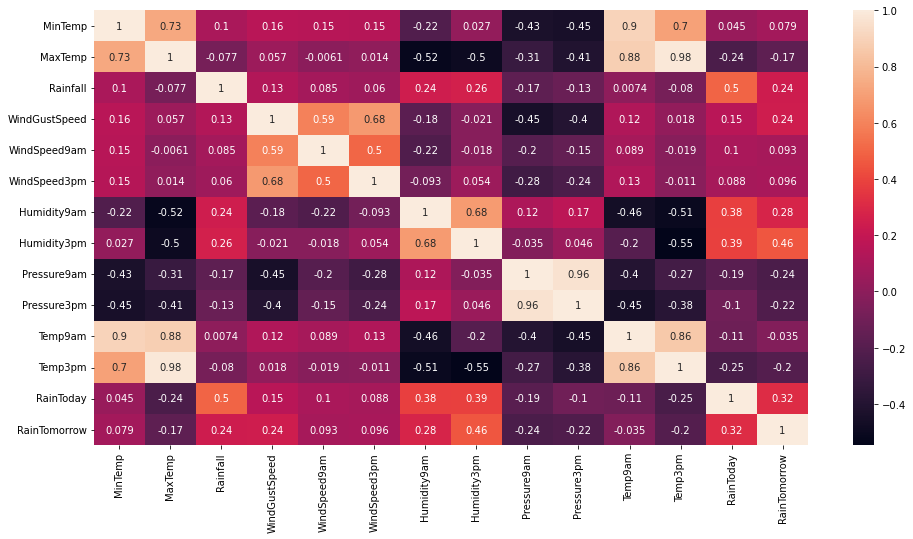

In [13]:
# Heat-map

plt.figure(figsize=(16, 8))
sns.heatmap(df.iloc[:,0:14].corr(), annot=True)

# 3. Determining the best model

In [14]:
# Using Feature Selection to find recommended columns if it will rain tomorrow

X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print('The 3 recommended attributes are:', X.columns[selector.get_support(indices=True)])

The 3 recommended attributes are: Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [15]:
# Assigned a new df with the selected columns

df = df[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = df.iloc[:,:-1].values
y = df['RainTomorrow'].values

## 3.1 Logistic Regression

In [16]:
#Logistic Regression 
t0=time.time()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
log_reg = LogisticRegression(max_iter = 500) # default - 100 cycles
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 83.31 %
Time taken : 0.09 S


In [17]:
compare_df = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_df.head(20)

,Actuals,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [18]:
# Precision

test_pre = precision_score(y_test, y_pred)
print("Precision = {:.2f}".format(test_pre))

Precision = 0.73


Confusion Matrix = 
 [[16737   787]
 [ 2983  2078]]


<AxesSubplot:>

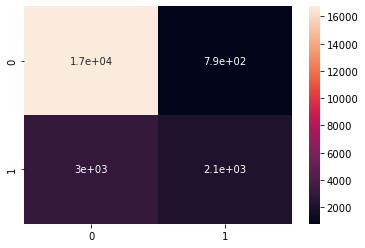

In [19]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [20]:
# Recall
test_rec = recall_score(y_test, y_pred)
print("Recall = {:.2f}".format(test_rec))

Recall = 0.41


## 3.2 Random Forest

In [21]:
# No Label encoding as Categorical values 'Yes' & 'No' have already been replaced earlier

In [22]:
# Random Forest

t0=time.time()

RF = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
compare_df = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})

score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 82.38 %
Time taken : 0.6 S


Confusion Matrix = 
 [[16595   929]
 [ 3050  2011]]


<AxesSubplot:>

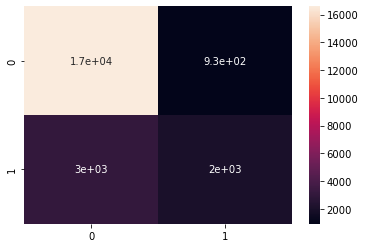

In [23]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [24]:
# Precision

test_pre = precision_score(y_test, y_pred)
print("Precision = {:.2f}".format(test_pre))

Precision = 0.68


In [25]:
# Recall

test_rec = recall_score(y_test, y_pred)
print("Recall = {:.2f}".format(test_rec))

Recall = 0.40


#### Conclusion

In conclusion, while the accuracy score of each model remained comparable with a difference of 1%, the random forest classifier had a longer computational time, which may also increase as the dataset grows larger. However, consideration must be set in place for the accuracy score as well. If the random forest classifier can demonstrate a higher accuracy score of considerable margins, it may be appropriate to utilize that model instead while keeping in mind of the trade off in performance.

For this use case, logistic regression will be the recommended model due to the low complexity dataset, resulting in high accuracy score while keeping computational time low. 
